## **Threshold Based Image** **Segmentation**

In [ ]:
import sys
import numpy as np
import skimage.color
import skimage.io
from skimage.viewer import ImageViewer
from matplotlib import pyplot as plt




**Simple** **Thresholding**

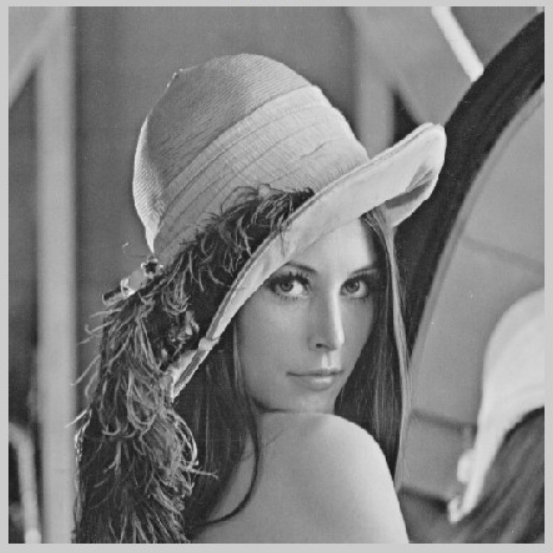

In [ ]:
# read image, based on command line filename argument;
# read the image as grayscale from the outset
filename='picture.PNG'
sigma=2
t=0.8 #Manually selecting threshold value
image=skimage.io.imread('picture.PNG')

from IPython.display import HTML, Image, display

Image('picture.PNG')



In [ ]:
histogram, bin_edges = np.histogram(image, bins=256)

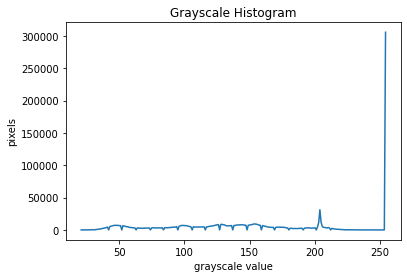

In [ ]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
# plt.ylim([0, 16000])
# plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

When we blur an image, we make the color transition from one side of an edge in the image to another smooth rather than sudden. The effect is to average out rapid changes in pixel intensity. The blur, or smoothing, of an image removes “outlier” pixels that may be noise in the image.

In [ ]:
blur=skimage.color.rgb2gray(image)
blur=skimage.filters.gaussian(blur,sigma)

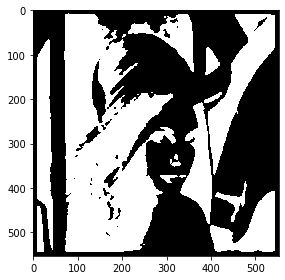

In [ ]:
#creating mask to obtain colored image at later stage
mask=blur < 0.5
sel = np.zeros_like(image)
skimage.io.imshow(mask)


In [ ]:
image.shape

(553, 553, 4)

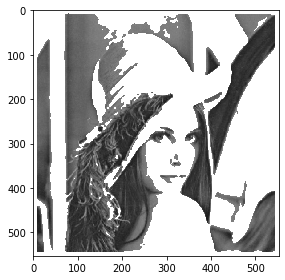

In [ ]:
sel[mask] = image[mask]
skimage.io.imshow(sel)
# display the result


**Otsu's Thresholding**


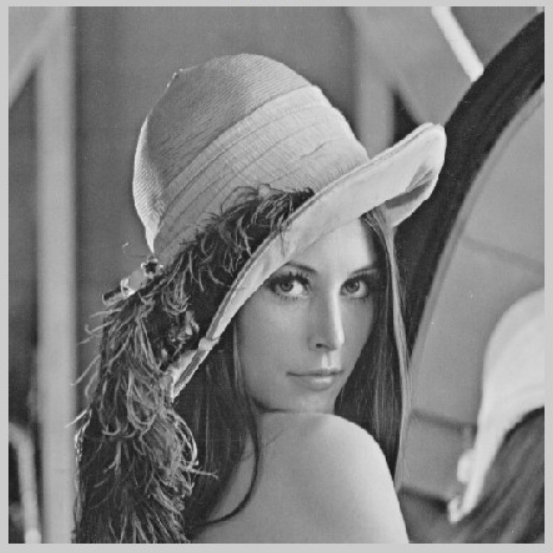

In [ ]:
sigma=2
# t=0.8 no need 
image2=skimage.io.imread('picture.PNG')
Image('picture.PNG')

In [ ]:
histogram2, bin_edges = np.histogram(image2, bins=256)

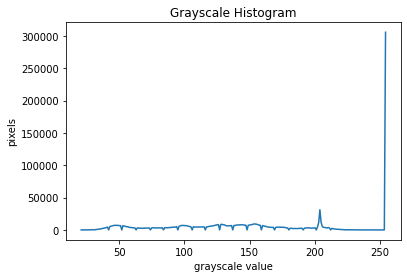

In [ ]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
# plt.ylim([0, 16000])
# plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram2)  # <- or here
plt.show()

In [ ]:
sigma=1.0
blur=skimage.color.rgb2gray(image2)
blur=skimage.filters.gaussian(blur,sigma)

In [ ]:
blur.shape

(553, 553)

In [ ]:
# perform otsu thresholding
t = skimage.filters.threshold_otsu(blur)
mask2 = blur > t
t #calculated using iterations

0.4741574578442087

In [ ]:
blur=skimage.color.rgb2gray(image2)
blur=skimage.filters.gaussian(blur,sigma)

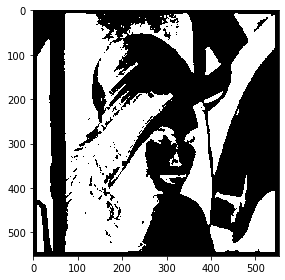

In [ ]:
mask1=blur < 0.5
sel1 = np.zeros_like(image2)
skimage.io.imshow(mask1)

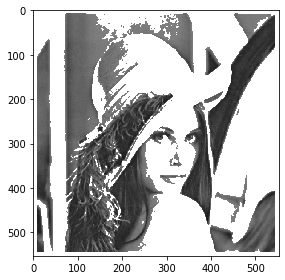

In [ ]:
# sel1 = np.zeros_like(image2)
sel1[mask1] = image2[mask1]
skimage.io.imshow(sel1)

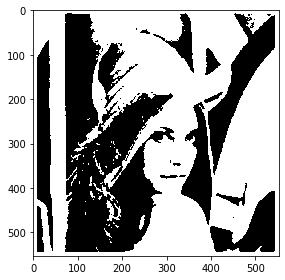

In [ ]:
skimage.io.imshow(mask2)

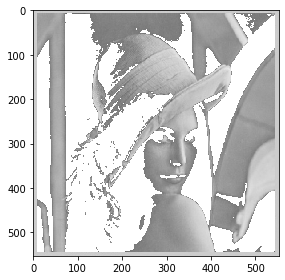

In [ ]:
sel2 = np.zeros_like(image2)
sel2[mask2] = image2[mask2]
skimage.io.imshow(sel2)

**Adaptive Thresholding**

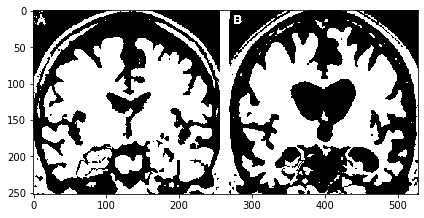

In [ ]:
import cv2  
import numpy as np  
   
# path to input image is specified and   
# image is loaded with imread command  
# image1 = cv2.imread('threshold_img1.jpg')  
image1 = cv2.imread('brain.jpg') 


# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale  
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
   
# applying different thresholding  
# techniques on the input image 
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5) 
  
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5) 
  
# the window showing output images 
# with the corresponding thresholding  
skimage.io.imshow(thresh1)
# skimage.io.imshow(thresh2)
     


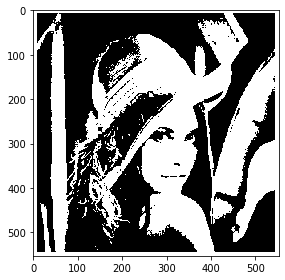

In [ ]:
import cv2  
import numpy as np  
   
# path to input image is specified and   
# image is loaded with imread command  
# image1 = cv2.imread('threshold_img1.jpg')  
image1 = cv2.imread('picture.PNG') 


# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale  
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
   
# applying different thresholding  
# techniques on the input image 
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5) 
  
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5) 
  
# the window showing output images 
# with the corresponding thresholding  
skimage.io.imshow(thresh1)
# skimage.io.imshow(thresh2)
     

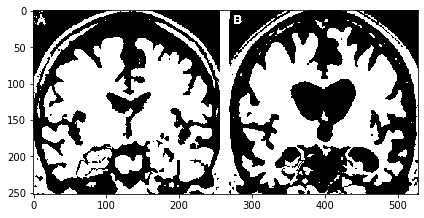

In [ ]:
skimage.io.imshow(thresh2)
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 